## 2A.
Evaluating `BFS`, `DFS`, `UCS`, `Iterative Deepening`, `Bidirectional Search`, `Greedy`, and `A*` Search algorithms using the graph from Question 2 and benchmarking them. 
    - The benchmark should be finding the path between each node. Randomly pick 10 cities. Find the path between them.

        For each algorithm :
        - What is the average time taken for each path search?
        - What is the solution length?

        Each experiment should be run `10` times


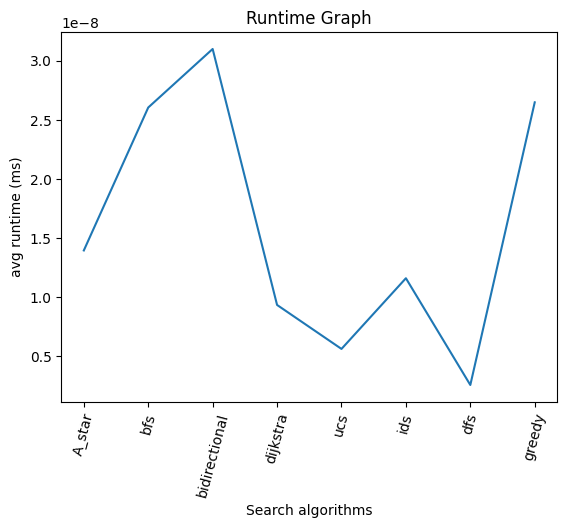

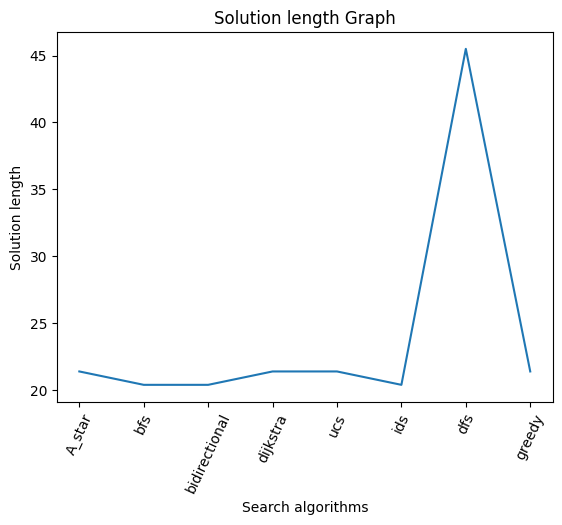

In [30]:

from runSearchExperimentTests import Experiment
from undirectedGraph import Graph
from romaniaCity import Romania
from matplotlib import pyplot as plt


romania_graph: Graph = Romania().get_city()
romania_coordinates = Romania().get_coordinates()

search_algorithms = ["A_star", "bfs", "bidirectional", "dijkstra", \
                    "ucs", "ids", "dfs", "greedy"]

search_runtime = [0.0 for _ in range(8)]
search_solution_length = [0.0 for _ in range(len(search_algorithms))]

search_runtime, search_solution_length = Experiment.run(romania_graph, romania_coordinates, 10)

plt.plot(search_algorithms, search_runtime)
plt.xticks(rotation=75)
plt.xlabel('Search algorithms') 
plt.ylabel('avg runtime (ms)')
plt.title("Runtime Graph") 
plt.show()

plt.plot(search_algorithms, search_solution_length)
plt.xticks(rotation = 65)
plt.xlabel('Search algorithms') 
plt.ylabel('Solution length') 
plt.title("Solution length Graph") 
plt.show()


## 2B.
Create random graphs with a number of nodes **n = `10`, `20`, `30`, `40`.**  Randomly connect nodes with the probability of edges **p = `0.2`,  `0.4`,  `0.6`,  `0.8`.** In total, you will have 16 graphs. The generated node will have randomly generated x, and y value that represents their locations. Use those coordinates to compute the heuristic functions. 

Randomly select 10 nodes and apply the above algorithms to find paths between them in all 16 graph settings. 
Register the time taken to find a solution for each algorithm and graph. Run each experiment 5 times and have the average of the time taken in the five experiments.
Use matplotlib.pyplot to plot their average time and solution (found path) length on each graph size. 

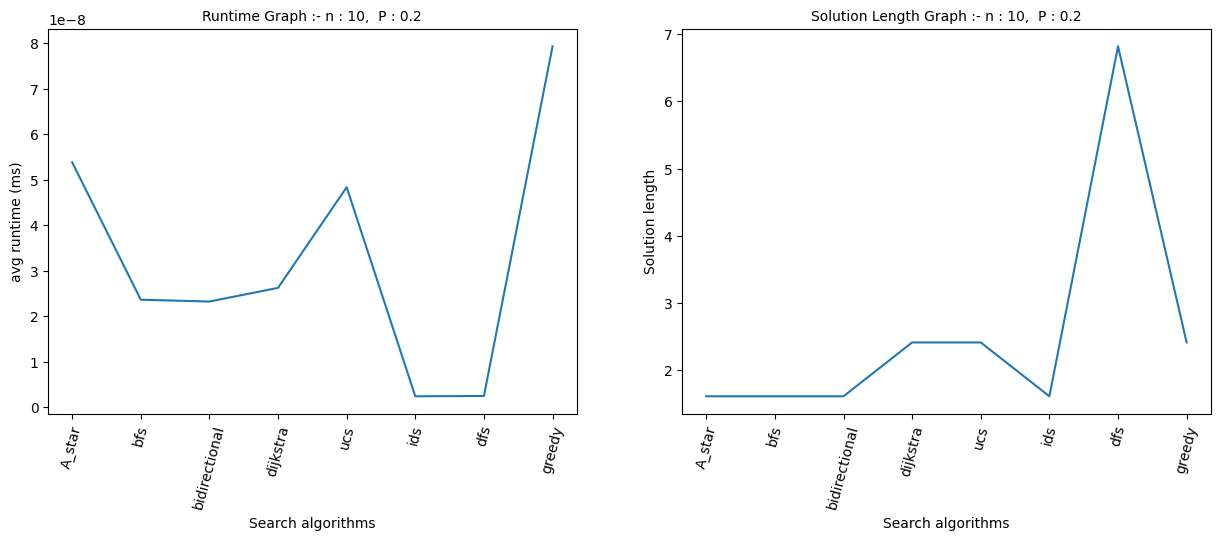

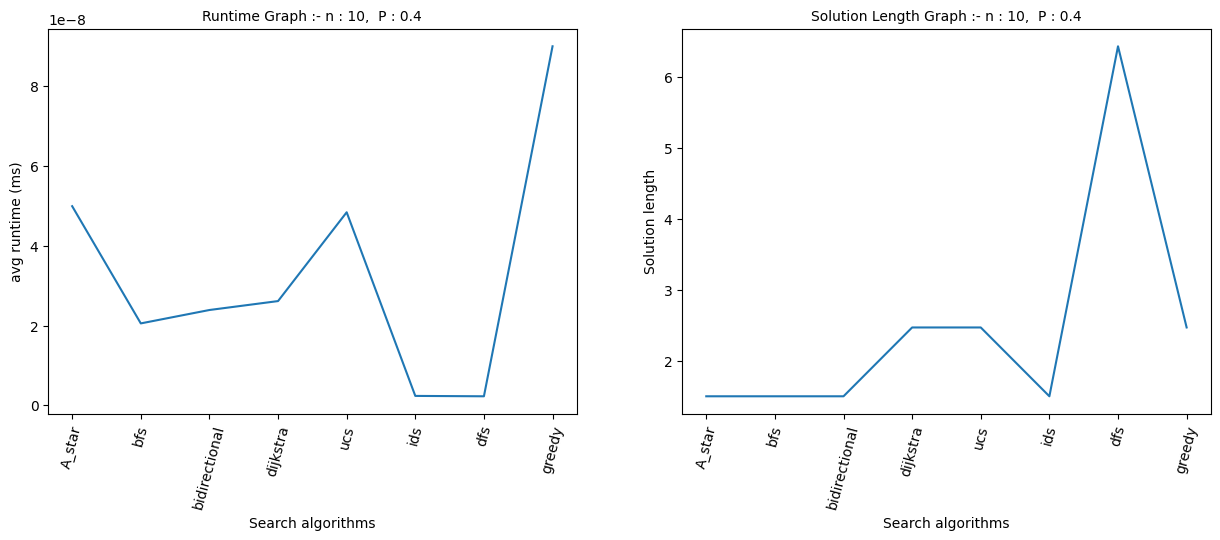

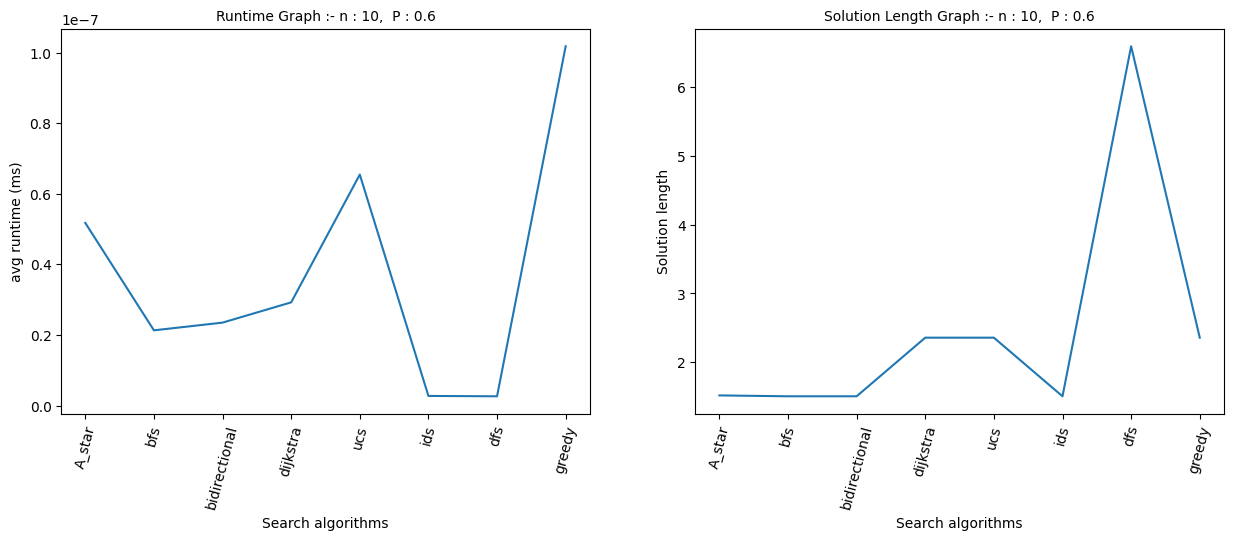

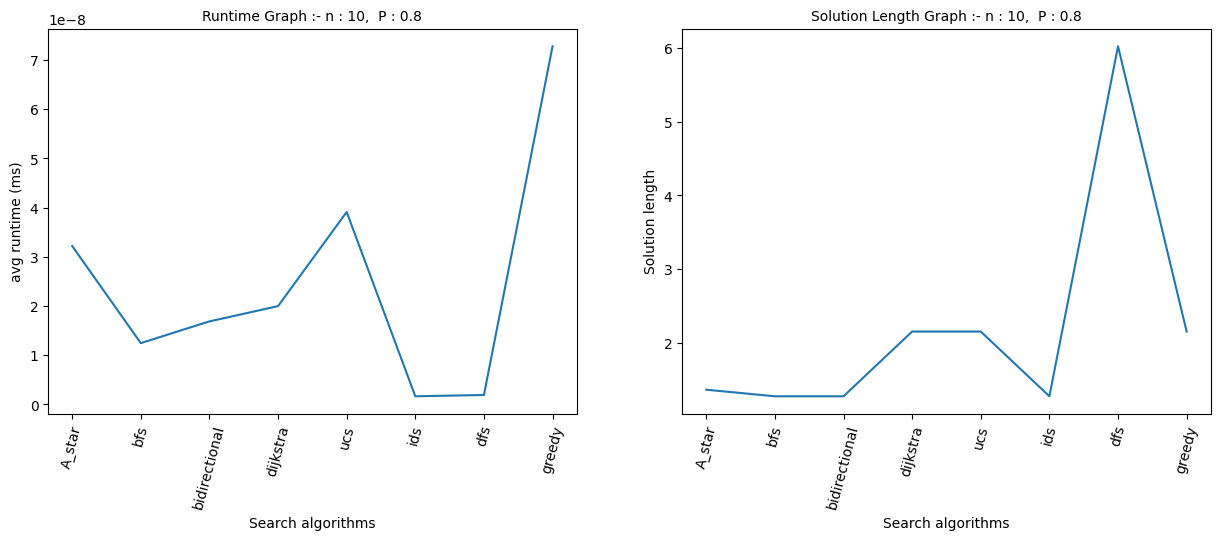

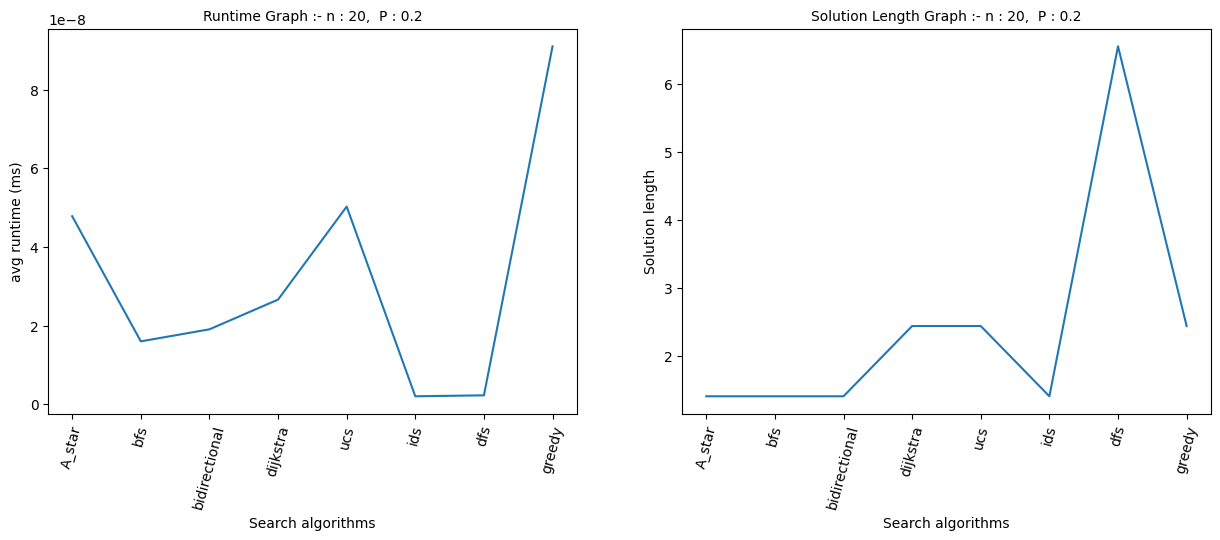

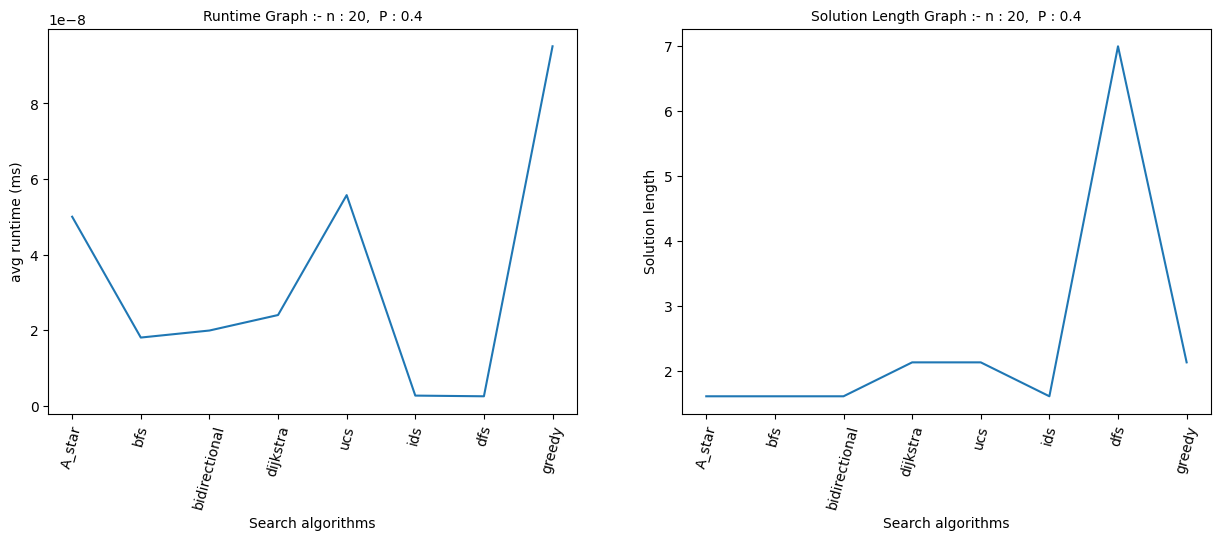

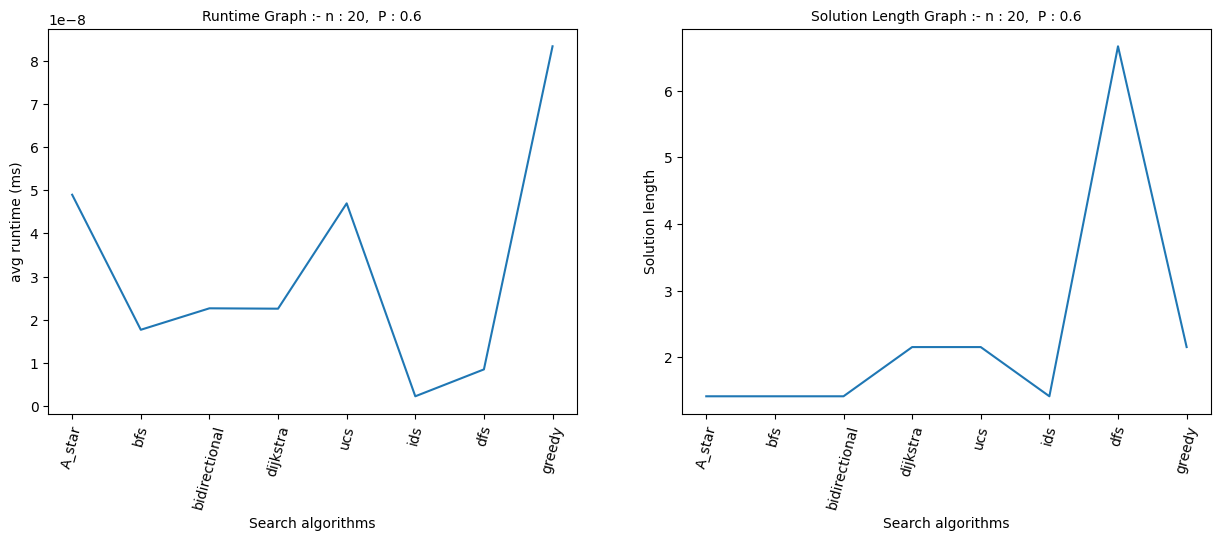

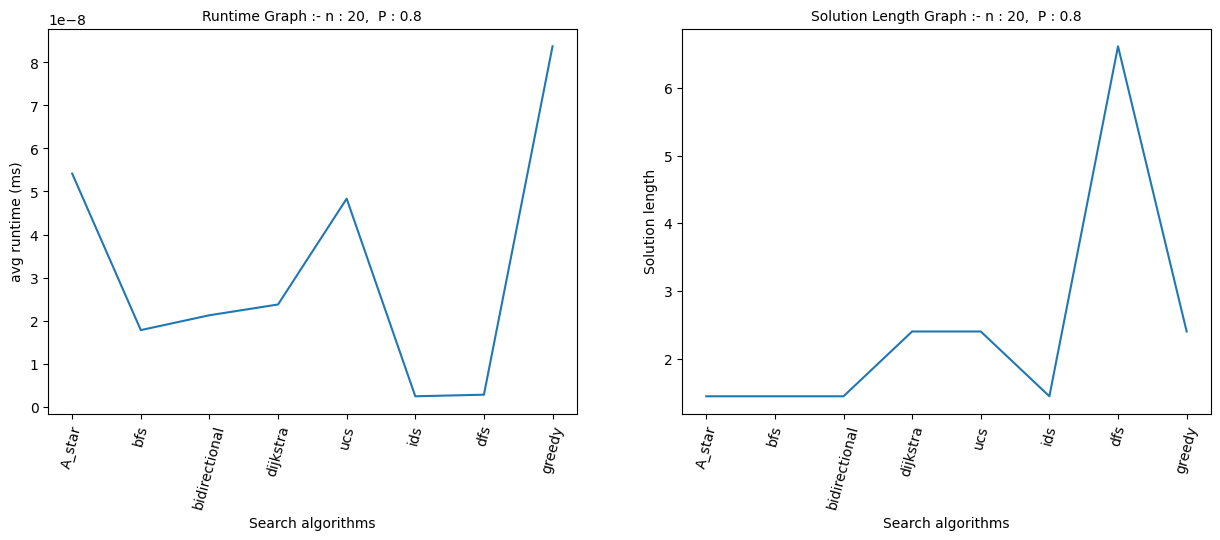

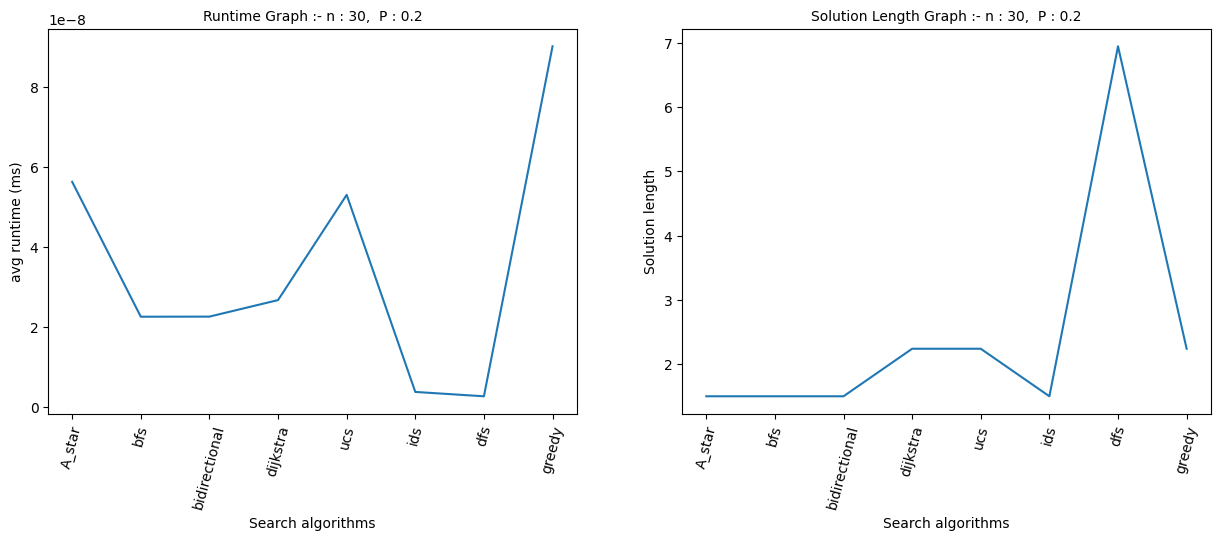

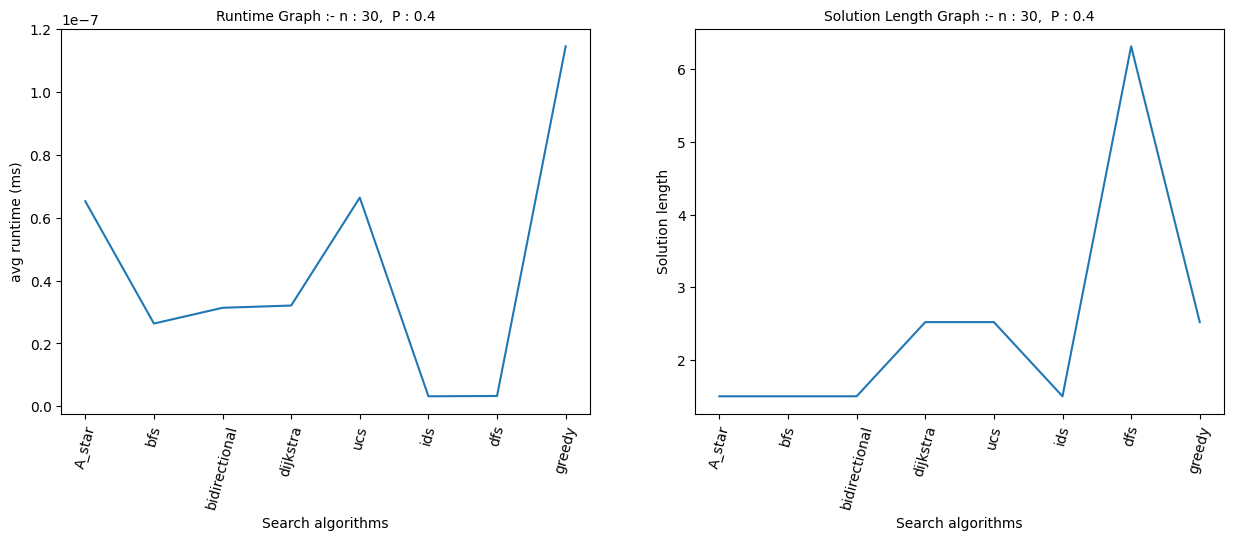

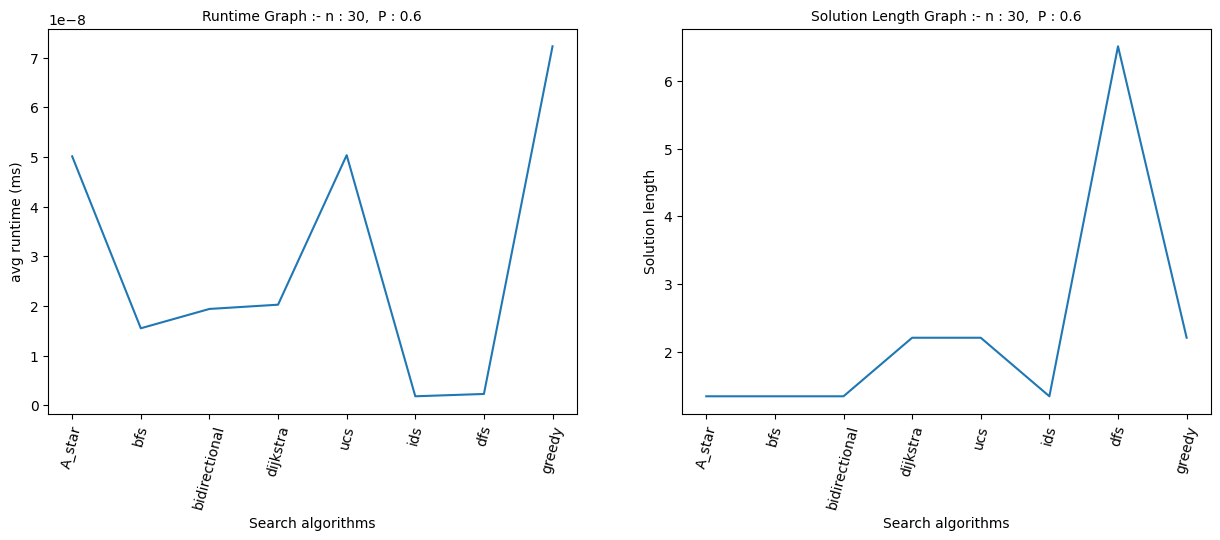

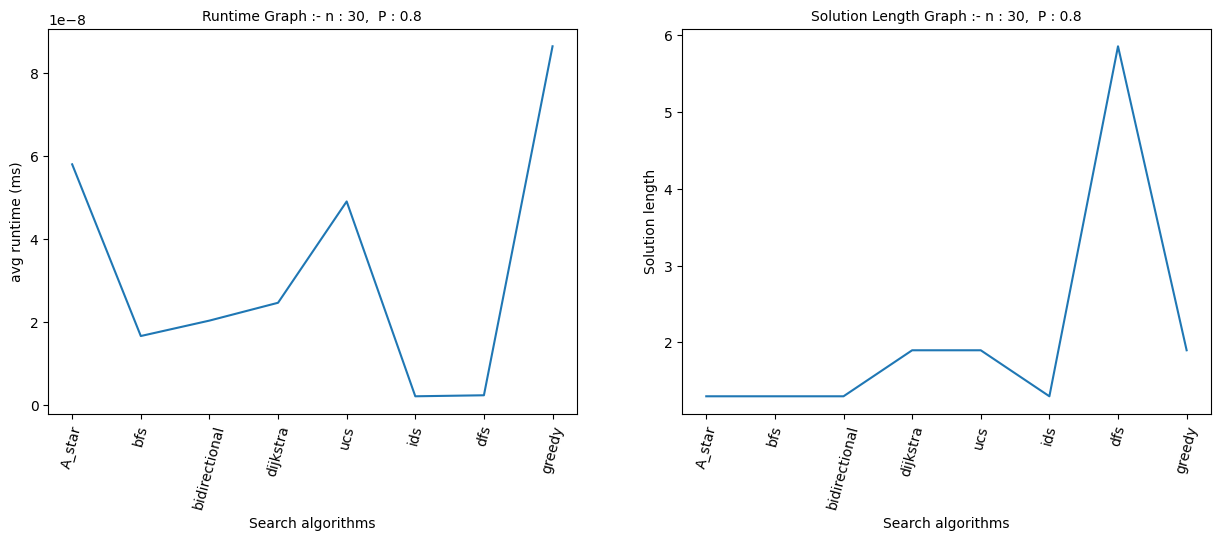

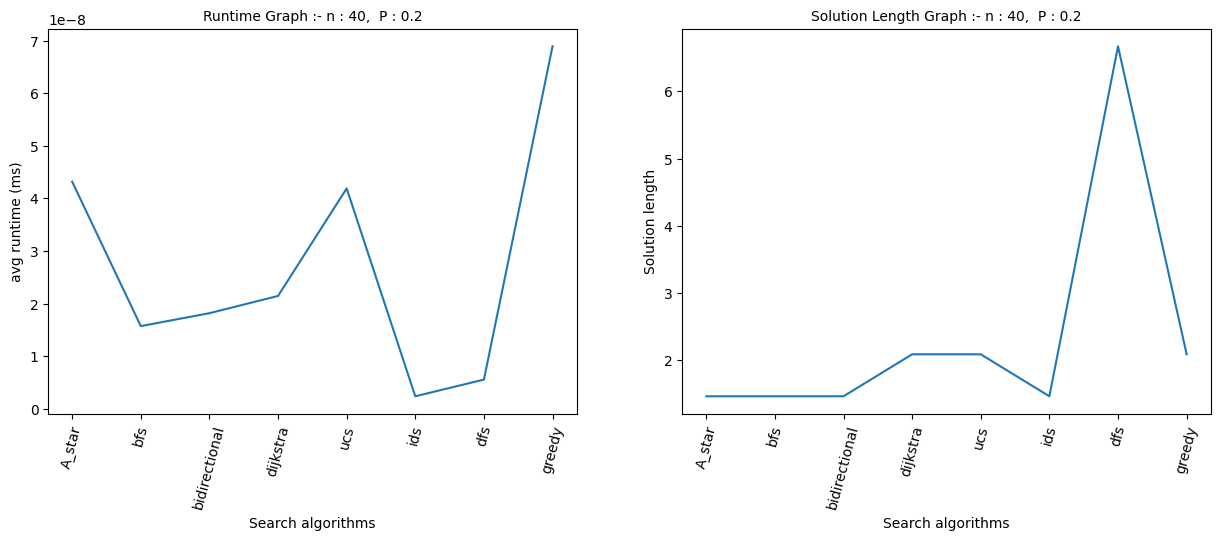

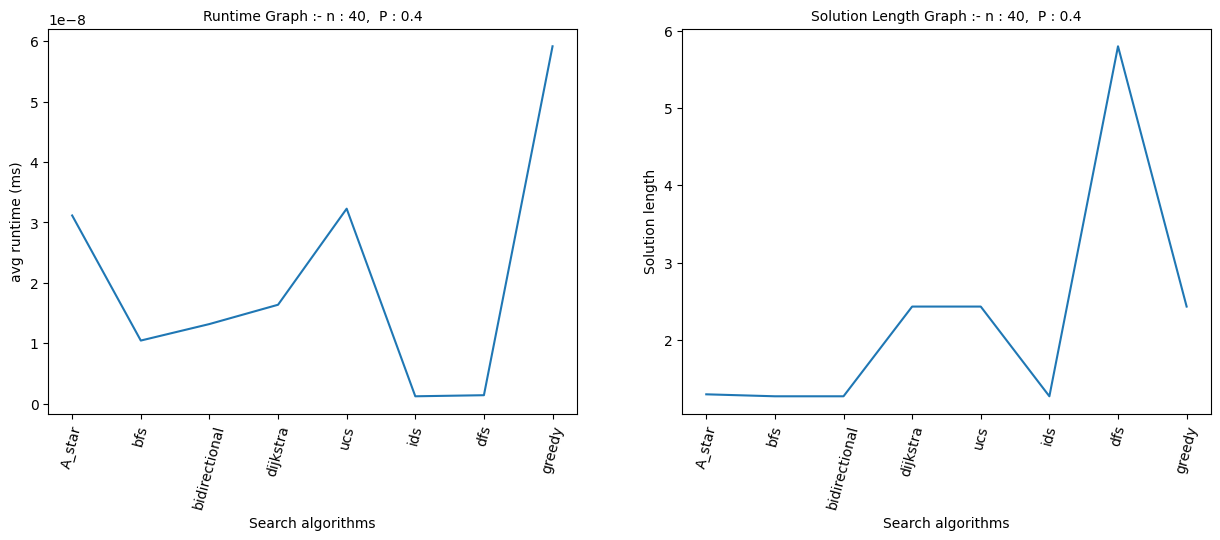

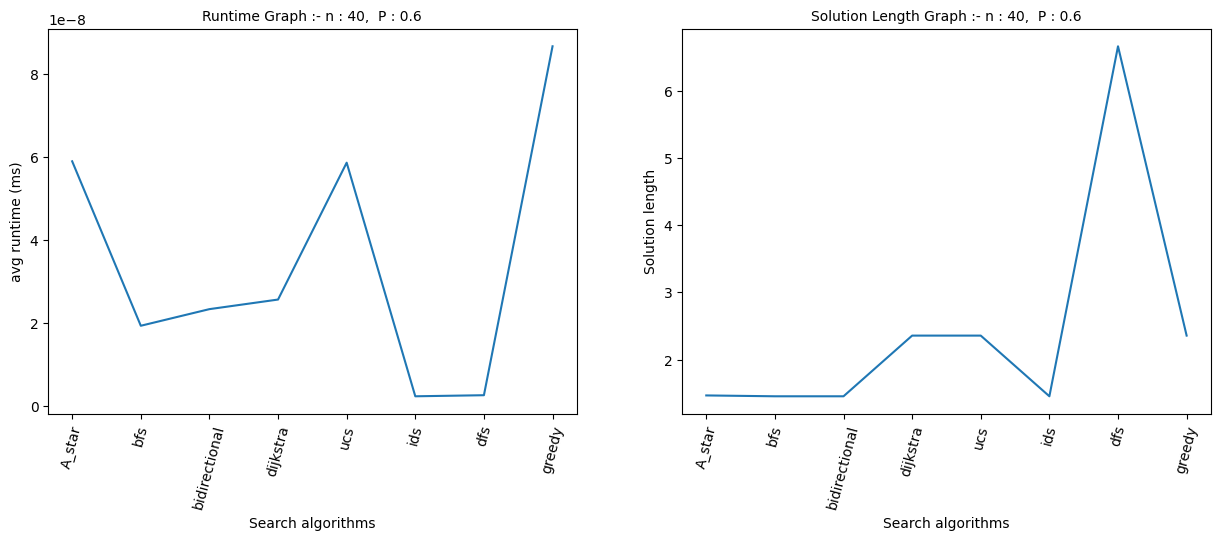

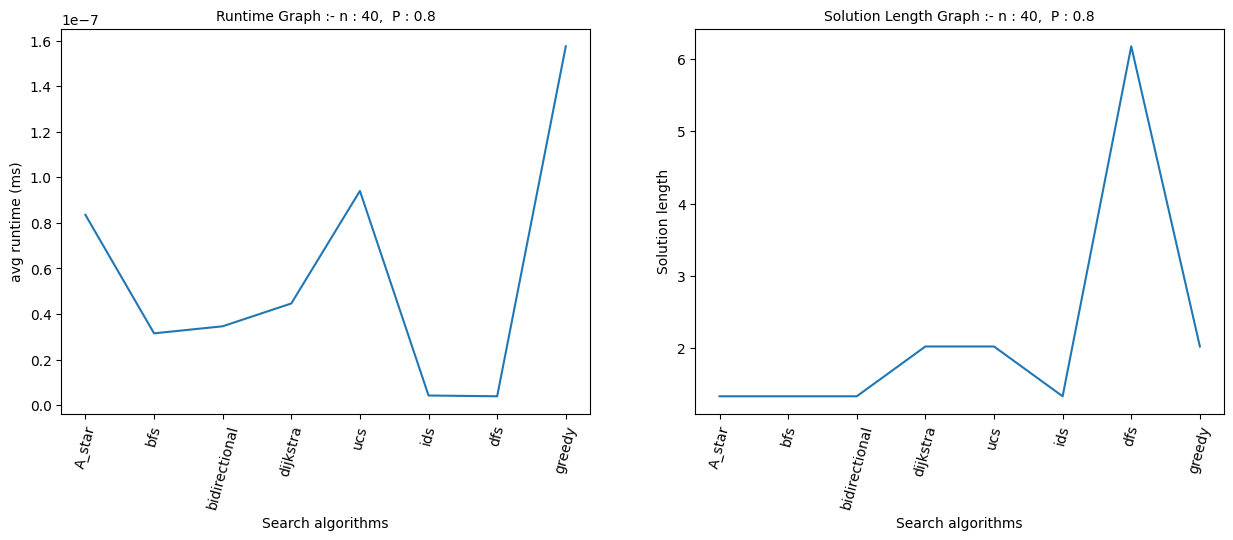

In [36]:

from matplotlib import pyplot as plt
from graphGenerator import Graph_Generator
from runSearchExperimentTests import Experiment



for n in [10, 20, 30, 40]:
    for p in [0.2, 0.4, 0.6, 0.8]:
        """
        16 possible graphs being generated and plotting their runtime using the search algorithm.
        """
        graph, coordinates = Graph_Generator.generate(40, 0.5)

        search_algorithms = ["A_star", "bfs", "bidirectional", "dijkstra", \
                            "ucs", "ids", "dfs", "greedy"]

        search_runtime = [0.0 for _ in range(8)]
        search_solution_length = [0.0 for _ in range(8)]

        search_runtime, search_solution_length = Experiment.run(graph, coordinates, number_of_experiments=5)

        fig, axs = plt.subplots(1, 2, figsize=(15, 5))

        axs[0].plot(search_algorithms, search_runtime)
        axs[0].set_xticks(search_algorithms)
        axs[0].set_xticklabels(search_algorithms, rotation=75)
        axs[0].set_xlabel('Search algorithms')
        axs[0].set_ylabel('avg runtime (ms)')
        axs[0].set_title(f'Runtime Graph :- n : {n},  P : {p}').set_fontsize(10)

        axs[1].plot(search_algorithms, search_solution_length)
        axs[1].set_xticks(search_algorithms)
        axs[1].set_xticklabels(search_algorithms, rotation=75)
        axs[1].set_xlabel('Search algorithms')
        axs[1].set_ylabel('Solution length')
        axs[1].set_title(f'Solution Length Graph :- n : {n},  P : {p}').set_fontsize(10)

        plt.show()


## 3.1 and 3.2.
There are several centralities types. Compute the `Degree`, `Closeness`, `Eigenvector`, `Katz`, `PageRank`, and `Betweenness` centralities on the graph from Question 2. (You have to read online how to calculate these centralities). 

* Compute these centralities for each node
* Report a table containing top-ranked cities in each centrality category



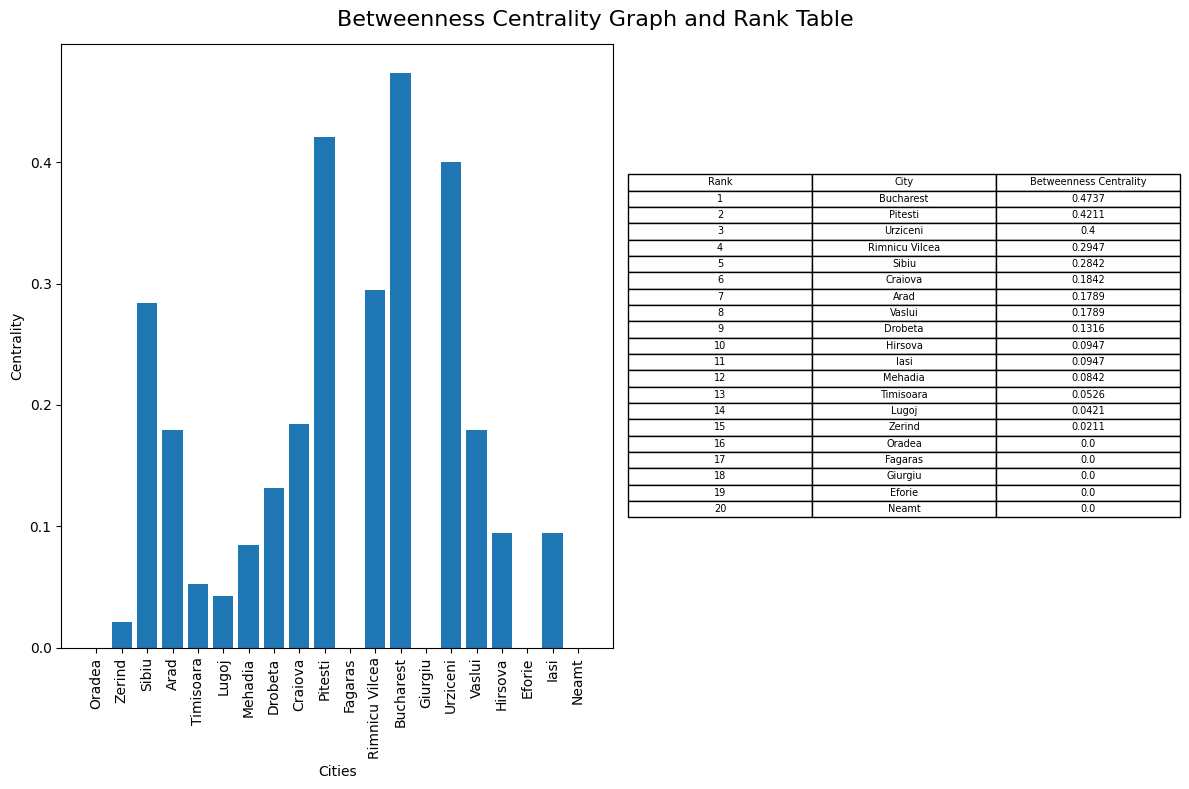

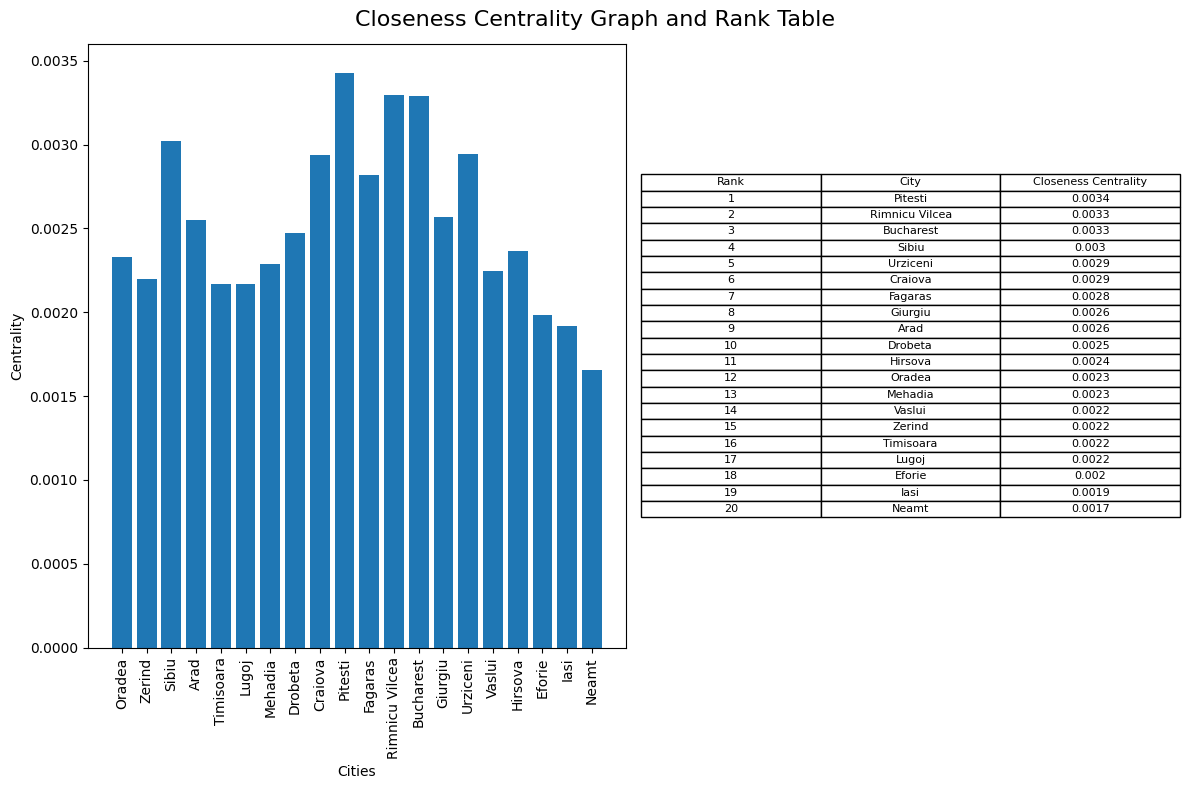

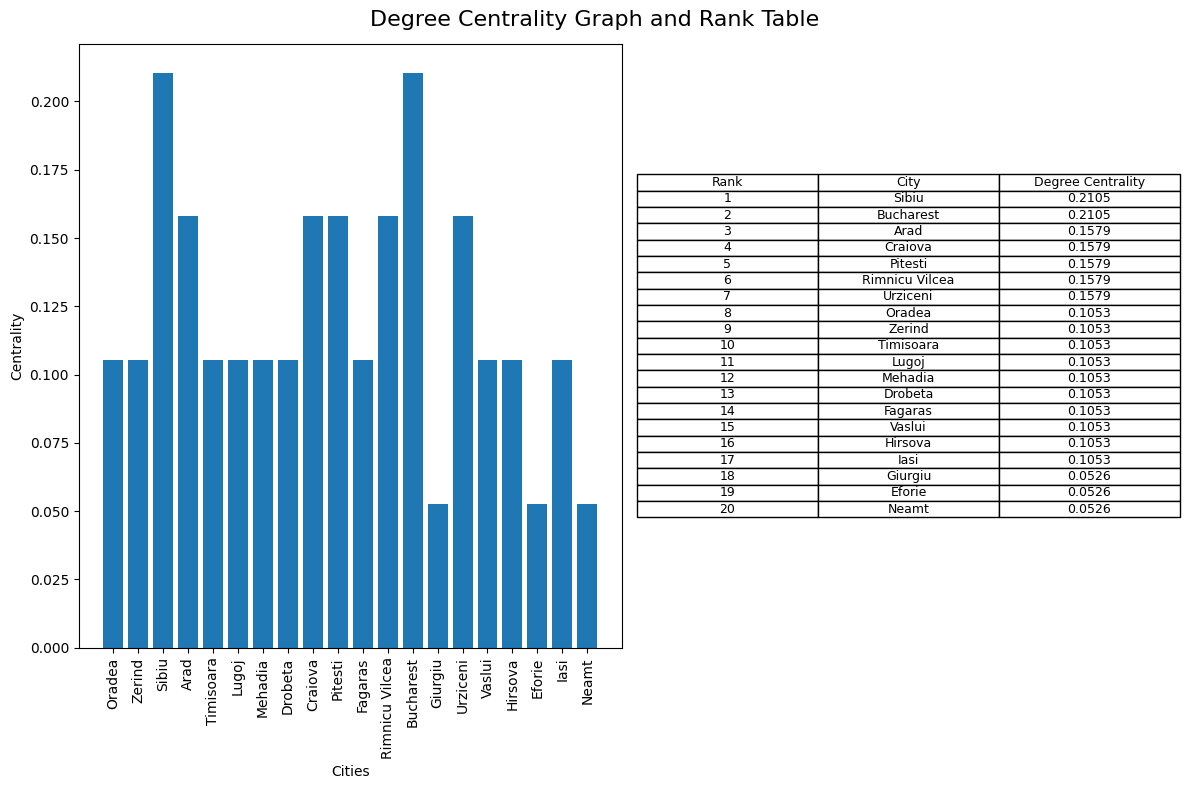

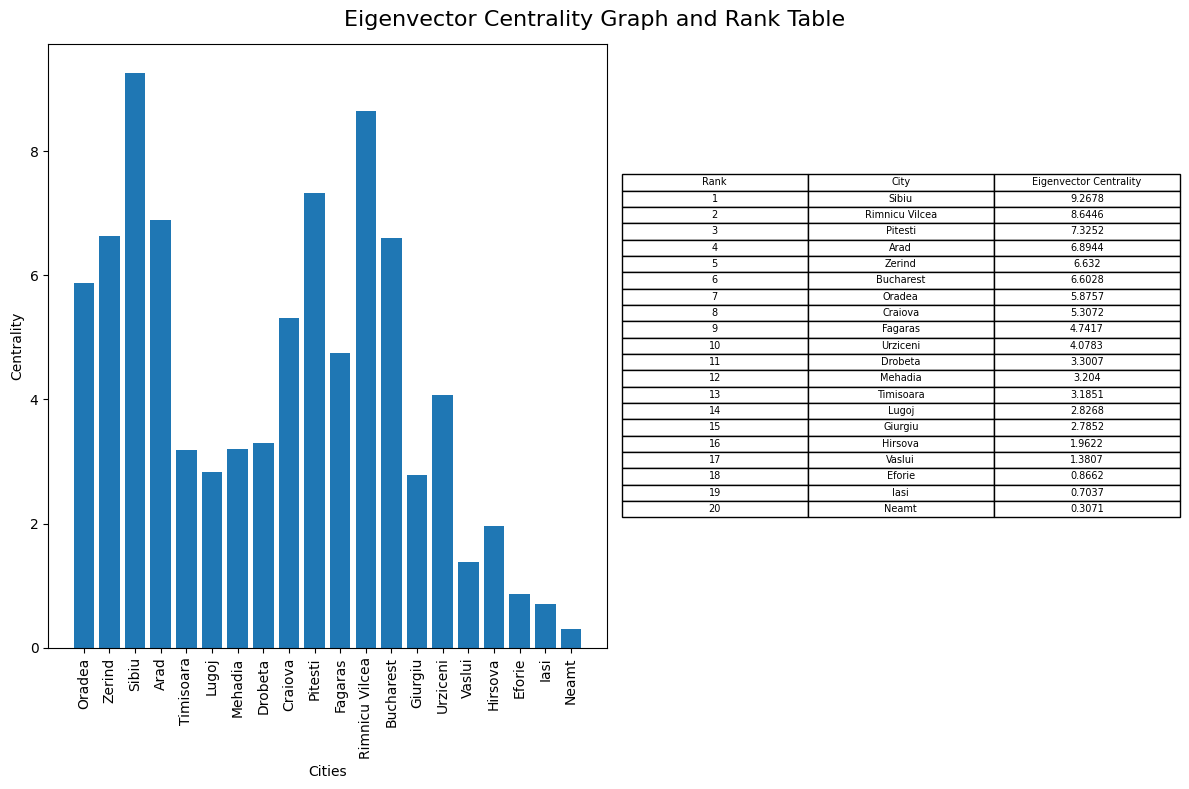

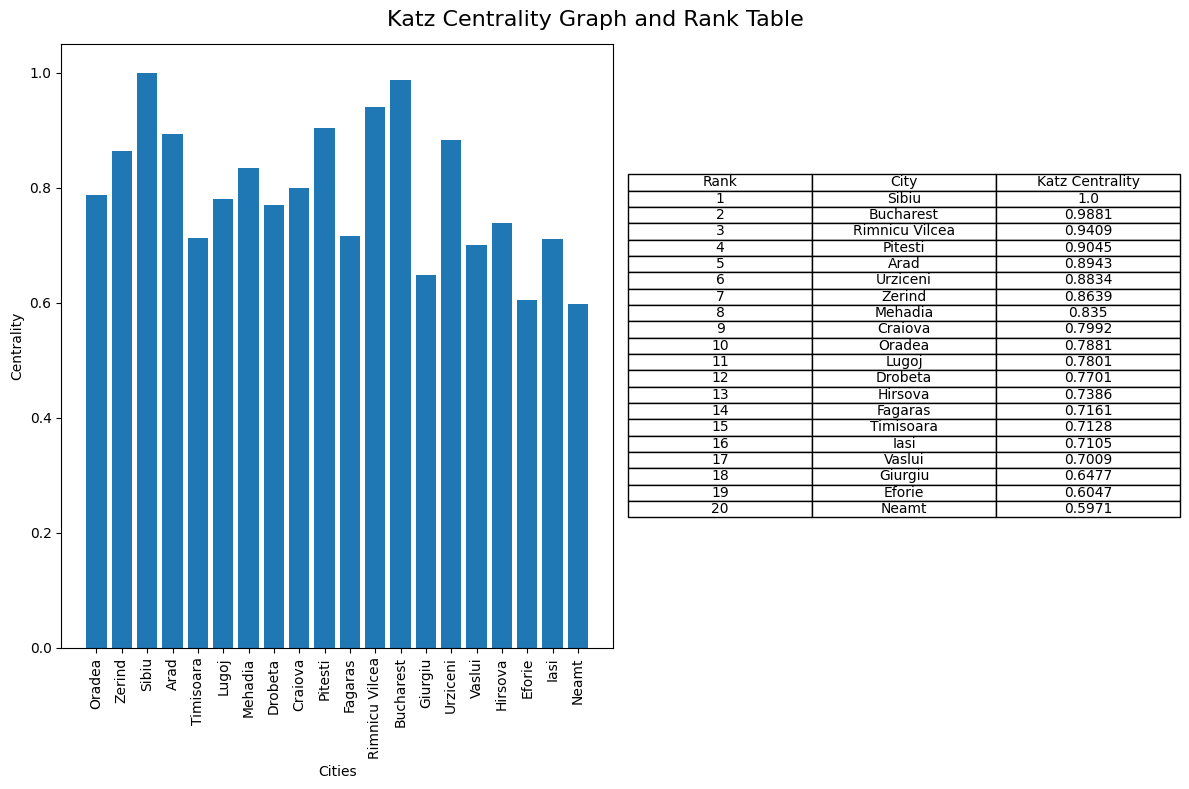

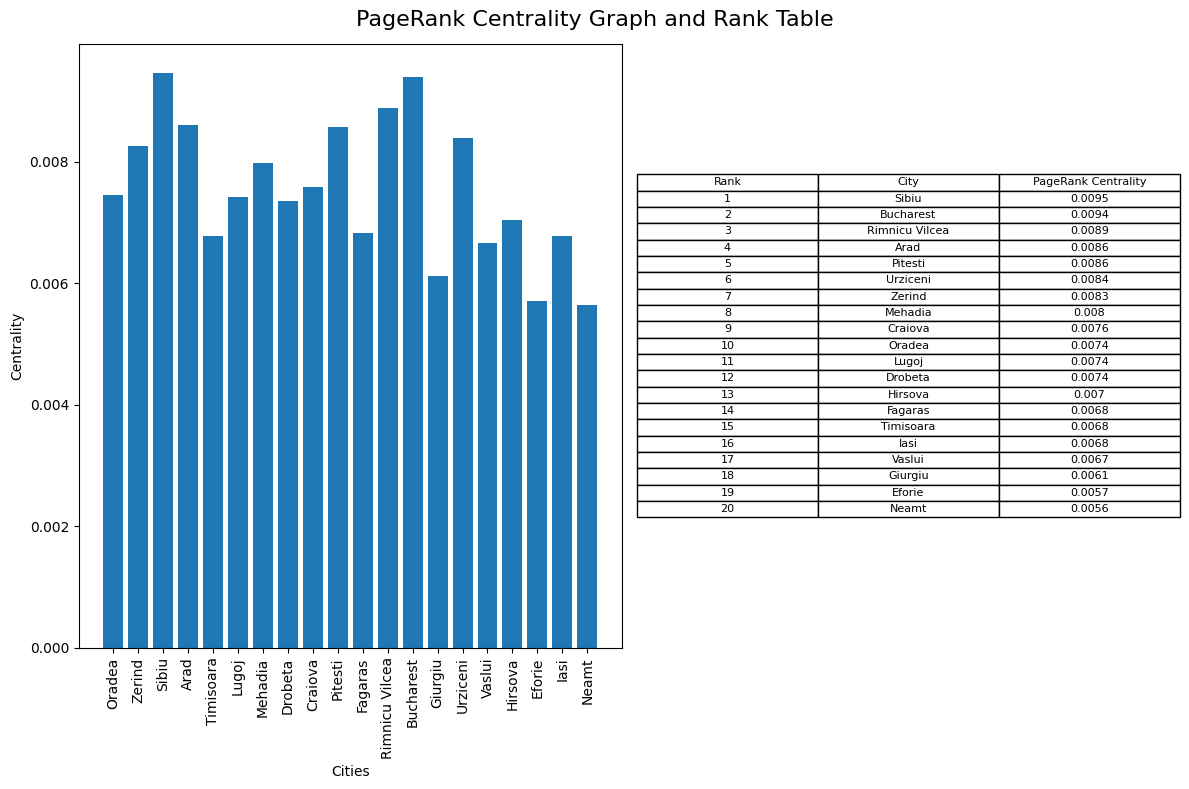

In [38]:
from typing import List, Mapping, Tuple
from centrality import Centrality as center
from romaniaCity import Romania
import matplotlib.pyplot as plt


# compute the centrality of every Romanian city.
romania_graph = Romania().get_city()
romania_coordinates = Romania().get_coordinates()

betweenness_centrality = center.betweenness_centrality(romania_graph)
closeness_centrality = center.closeness_centrality(romania_graph)
degree_centrality = center.degree_centrality(romania_graph)
eigenvector_centrality = center.eigenvector_centrality(romania_graph)
katz_centrality = center.katz_centrality(romania_graph)
pagerank_centrality = center.pagerank_centrality(romania_graph)

centrality_list : List[Tuple[Mapping,str]] = [(betweenness_centrality, "Betweenness"),\
                (closeness_centrality, "Closeness"),(degree_centrality, "Degree"),\
                (eigenvector_centrality, "Eigenvector"),\
                (katz_centrality, "Katz"),\
                (pagerank_centrality, "PageRank")]

x_values = list(romania_graph.get_nodes())

for centrality in centrality_list:
    y_values = []
    centrality_dict, centrality_name = centrality

    for key in x_values:
        y_values.append(centrality_dict[key])

    # create a figure with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(12,8))

    # plot the bar chart in the first column
    axs[0].bar(x_values, y_values)
    axs[0].set_xticks(range(len(x_values)))
    axs[0].set_xticklabels(x_values, rotation=90)
    axs[0].set_xlabel('Cities') 
    axs[0].set_ylabel('Centrality')

    # create a sorted list of cities by centrality
    sorted_cities = sorted(x_values, key=lambda x: centrality_dict[x], reverse=True)

    # create a table displaying the ranking of cities by centrality in the second column
    table_data = [["Rank", "City", centrality_name + " Centrality"]]
    for i in range(len(sorted_cities)):
        table_data.append([str(i+1), sorted_cities[i], round(centrality_dict[sorted_cities[i]], 4)])

    axs[1].axis('off')
    axs[1].axis('tight')
    axs[1].table(cellText=table_data, colLabels=None, cellLoc='center', loc='center') # type: ignore

    fig.suptitle(f'{centrality_name} Centrality Graph and Rank Table', fontsize=16)
    fig.tight_layout()

    # show the figure
    plt.show()


## 3.3.

<p>Summarize your observations</p>

<h2 style="color: orange; text-decoration: underline;">Observation Analysis</h2>


<h2 style="color: orange; text-decoration: underline;">Experiment 1 (2A)</h2>

<p>Evaluating the average runtime and solution length for the search algorithms.</p>

In this experiment we implemented the following graph search algorithms.
- Breadth First Search
- Depth First search
- Uniform Cost search
- Iterative Deepening
- Bidirectional Search
- Greedy Search
- A* Search


- We run the experiment on each of the search algorithms, selecting 10 random cities from the graph and run the search algorithms between each nodes 5 times (trials) and recorded the above result.

- We anticipated that a* search would have the best runtime but it performed somehow less as compared to dijkstra, ucs and dfs. We thinks that happened due to the fact that it has to calculate the heuristics for each next step. That may have taken time.

- In terms of Solution length the optimal path solution is guaranteed to be found by `dijkstra`, and `a* search` algorithms resulting in a shorter solution length. 

---
<h2 style="color: orange; text-decoration: underline;">Experiment 2 (2B)</h2>

- On this experiment we implemented a random graph generator to generate a graph based on the parameter inputs :

    - number of nodes
    - probability of edge: the higher the probability the more probability of connection between nodes.

 As we run each search algorithm the result shows that average runtime of a_star search decreases as the probability of edge increases.




---
<h2 style="color: orange; text-decoration: underline;">Experiment 3 (3.1 and 3.2) </h2>

- On this experiment we implemented the following 6 centrality algorithms:
    - Betweenness Centrality
    - Closeness Centrality
    - Degree Centrality
    - Eigenvector Centrality
    - Katz Centrality
    - Pagerank Centrality

---
 - __Betweeness Centrality__: The top 3 in this rank are `Bucharest`, `Pitesti`, and `Urziceni`. This is expected as most shortest paths between nodes pass through these. On the other hand we see that these 5 songs, `Oradea`, `Fagaras`, `Giurgiu`, `Eforie`, and `Neamt`, have a value of 0. This shows that no shortest path between any other cities pass through these. so these are the least central. From this centrality we can infer how important a node is to go between other pairs of nodes.

 - __Closeness Centrality__: `Pitesti`, `Rimnicu Vicea`, and `Bucharest` are the top 3 with this centrality. They are relatively placed on the center if we see the map to the city, making their distance to all other cities. This centrality is an indication of how close a node is to all other nodes in the network. On the other hand cities `Eforie`, `Iasi`, and `Neamt` are located in the map far from the center making their average distance to other nodes large(not so close) compared to the ones located on the center.

- __Degree Centrality__: This is a fairly straight forward centrality, which takes into account the number of connections (edges) it has. Cities `Sibiu`, and `Bucharest` are the top ranking ones with `4` edges and centrality of `0.2105` centrality each as shown in the table. The centrality decreases as we go down the table with 3, 2, and 1 edges.

- __Eigenvector Centrality__ : `Sibiu`, `Rimnicu Vilcea`, and `Pitesti`are the top 3 here. In this centrality it's not just the number of connections you have but how important your connections themselves are. From these result we see that `Rimnicu Vilcea` having just 3 connections is more central than `Bucharest` because it's connections `Sibiu`, `craiova`, and `pitesti` are all highly central (important). on the other hand `Bucharest's` connections `Giurgiu` has only 1 edge and `Fagaras` has only `2 edges`. That shows that using eigenvector centrality gives us a way to measure not just the number of connections a node has but how important are it's connections themselves.

- __Katz Centrality__: This centrality measures the influence of a node based on its connections to other highly influential nodes. It assigns scores to nodes based on the number of paths that connect them to other nodes and takes into account the importance of each connecting node. In this dataset, `Sibiu`, `Bucharest`, and `Rimnicu Vilcea` have higher Katz centrality scores than the other cities, indicating that they are more influential in terms of the connections they have to other important nodes.

- __Pagerank Centrality__: This centrality algorithm is based on the concept of "voting" or recommendation. A node with many incoming edges from high-scoring nodes contributes more to the score of the nodes it connects to than a node with fewer such edges. In this dataset, `Sibiu`, `Bucharest`, and `Rimnicu Vilcea` have the highest Pagerank centrality scores, indicating that they receive many inbound connections from highly central nodes. 
---
